# **Analysis on Human Annotated Set For Bluesky Social and Politisky Datasets**

**We evaluate model performance on a manually annotated subset of 200 samples using accuracy and macro-averaged F1 score. Confusion matrices are used to analyze class-level behavior, and qualitative error inspection highlights common failure cases.**

In [ ]:
from pathlib import Path

THIS_DIR = Path.cwd() 

ROOT_DIR = THIS_DIR.parents[1]

INPUT_DIR = ROOT_DIR / "datasets"
OUTPUT_DIR = ROOT_DIR / "annotated_datasets"

In [ ]:
import pandas as pd
df_eval = pd.read_csv(f"{INPUT_DIR}/human/social_sentiment_test_sample_200.csv")
df_eval_politisky = pd.read_csv(f"{INPUT_DIR}/human/politisky_sentiment_test_sample_200.csv")

**Labels are normalized to keep labels consistent across models and human annotations**

In [2]:
def normalize_label(x):
    if not isinstance(x, str):
        return None
    x = x.lower().strip()
    if x in ["positive", "pos"]:
        return "positive"
    if x in ["negative", "neg"]:
        return "negative"
    if x in ["neutral", "neu"]:
        return "neutral"
    return None


In [3]:
df_eval_politisky["human"] = df_eval_politisky["human"].apply(normalize_label)
df_eval_politisky["sent_bert"] = df_eval_politisky["sent_bert"].apply(normalize_label)
df_eval_politisky["sent_zeroshot"] = df_eval_politisky["sent_zeroshot"].apply(normalize_label)


In [ ]:
df_eval["human"] = df_eval["human"].apply(normalize_label)
df_eval["sent_bert"] = df_eval["sent_bert"].apply(normalize_label)
df_eval["sent_zeroshot"] = df_eval["sent_zeroshot"].apply(normalize_label)


**Evaluation metrics (Accuracy + Macro F1)**

**BERT vs Human**

**Bluesky Social Dataset**

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
acc_bert = accuracy_score(df_eval["human"], df_eval["sent_bert"])
f1_bert = f1_score(df_eval["human"], df_eval["sent_bert"], average="macro")

print("BERT vs Human")
print("Accuracy:", acc_bert)
print("Macro F1:", f1_bert)


BERT vs Human
Accuracy: 0.585
Macro F1: 0.41648270787343633


**Politisky Dataset**

In [5]:

acc_bert_politisky = accuracy_score(df_eval_politisky["human"], df_eval_politisky["sent_bert"])
f1_bert_politisky = f1_score(df_eval_politisky["human"], df_eval_politisky["sent_bert"], average="macro")

print("BERT vs Human")
print("Accuracy:", acc_bert_politisky)
print("Macro F1:", f1_bert_politisky)

BERT vs Human
Accuracy: 0.75
Macro F1: 0.4934516265314744


**Zero-shot vs Human**

**Bluesky Social Dataset**

In [ ]:
acc_zs = accuracy_score(df_eval["human"], df_eval["sent_zeroshot"])
f1_zs = f1_score(df_eval["human"], df_eval["sent_zeroshot"], average="macro")

print("Zero-shot vs Human")
print("Accuracy:", acc_zs)
print("Macro F1:", f1_zs)


Zero-shot vs Human
Accuracy: 0.705
Macro F1: 0.6060109513470703


**Politisky Dataset**

In [6]:
acc_zs_p = accuracy_score(df_eval_politisky["human"], df_eval_politisky["sent_zeroshot"])
f1_zs_p = f1_score(df_eval_politisky["human"], df_eval_politisky["sent_zeroshot"], average="macro")

print("Zero-shot vs Human")
print("Accuracy:", acc_zs_p)
print("Macro F1:", f1_zs_p)


Zero-shot vs Human
Accuracy: 0.75
Macro F1: 0.4569470227045552


**BERT vs Zero-shot (model agreement)**

**Bluesky Social Dataset**

In [ ]:
acc_models = accuracy_score(df_eval["sent_bert"], df_eval["sent_zeroshot"])

print("BERT vs Zero-shot agreement:", acc_models)


BERT vs Zero-shot agreement: 0.71


**Politisky Dataset**

In [7]:
acc_models_p = accuracy_score(df_eval_politisky["sent_bert"], df_eval_politisky["sent_zeroshot"])

print("BERT vs Zero-shot agreement:", acc_models_p)


BERT vs Zero-shot agreement: 0.725


**Confusion Matrices**

**BERT vs Human**

**Bluesky Social Dataset**

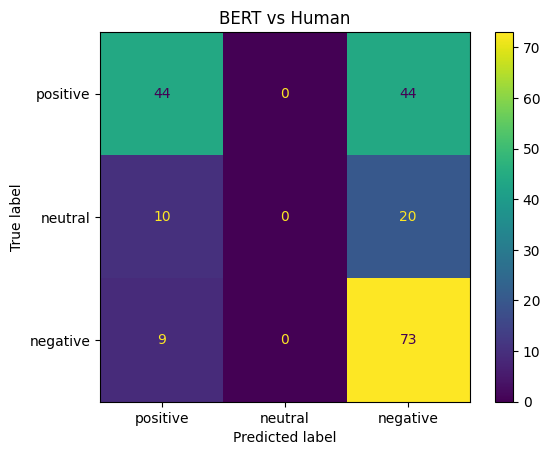

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm_bert = confusion_matrix(
    df_eval["human"],
    df_eval["sent_bert"],
    labels=["positive", "neutral", "negative"]
)

ConfusionMatrixDisplay(
    cm_bert,
    display_labels=["positive", "neutral", "negative"]
).plot()
plt.title("BERT vs Human")
plt.show()


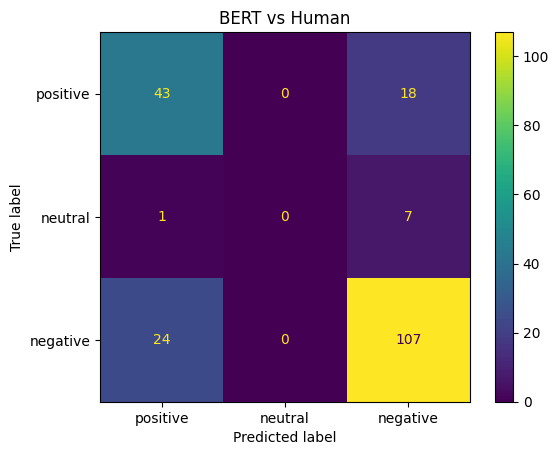

In [8]:
cm_bert_p = confusion_matrix(
    df_eval_politisky["human"],
    df_eval_politisky["sent_bert"],
    labels=["positive", "neutral", "negative"]
)

ConfusionMatrixDisplay(
    cm_bert_p,
    display_labels=["positive", "neutral", "negative"]
).plot()
plt.title("BERT vs Human")
plt.show()


**Zero-shot vs Human**

**Bluesky Social Dataset**

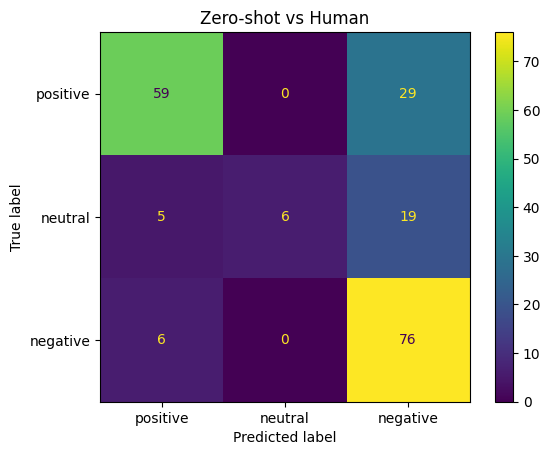

In [ ]:
cm_zs = confusion_matrix(
    df_eval["human"],
    df_eval["sent_zeroshot"],
    labels=["positive", "neutral", "negative"]
)

ConfusionMatrixDisplay(
    cm_zs,
    display_labels=["positive", "neutral", "negative"]
).plot()
plt.title("Zero-shot vs Human")
plt.show()


**Politisky Dataset**

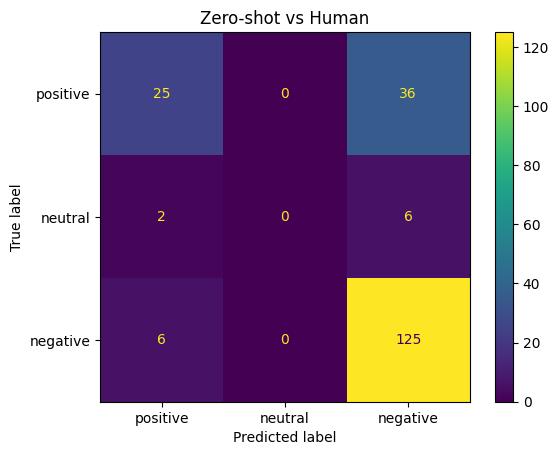

In [9]:
cm_zs_p = confusion_matrix(
    df_eval_politisky["human"],
    df_eval_politisky["sent_zeroshot"],
    labels=["positive", "neutral", "negative"]
)

ConfusionMatrixDisplay(
    cm_zs_p,
    display_labels=["positive", "neutral", "negative"]
).plot()
plt.title("Zero-shot vs Human")
plt.show()


**Error analysis**

**Where BERT is wrong: Top 5 Examples for Bluesky Social Dataset**

In [ ]:
bert_errors = df_eval[
    df_eval["sent_bert"] != df_eval["human"]
][["text", "human", "sent_bert"]]

bert_errors.head(5)


,text,human,sent_bert
1,"Okay pals, I'm making a list here, and checkin...",positive,negative
6,Good Morning Bluesky. I hope y'all have a good...,negative,positive
7,I know Brits aren't talking shit ::rolls up sl...,neutral,negative
8,I could really use a morning massage 😈,neutral,negative
10,Guess who got a portable Seestar for Xmas? (My...,positive,negative


**Where BERT is wrong: Top 5 Examples for Politisky Dataset**

In [12]:
bert_errors_p = df_eval_politisky[
    df_eval_politisky["sent_bert"] != df_eval_politisky["human"]
][["text", "human", "sent_bert"]]

bert_errors_p.head(5)


,text,human,sent_bert
3,"Ugh, dog do I hate musk and his apartheid lovi...",negative,positive
4,Liz Cheney endorses Kamala Harris at an event ...,negative,positive
5,Fuck trump! I filmed this at a Trump rally a f...,negative,positive
7,STOP THE PRESSES! TRUMP ENDORSES KAMALA!!!! He...,negative,positive
8,Kamala Harris would have been an excellent pre...,negative,positive


**Where Zero-shot is wrong: Top 5 Examples for Bluesky Social Dataset**

In [ ]:
zs_errors = df_eval[
    df_eval["sent_zeroshot"] != df_eval["human"]
][["text", "human", "sent_zeroshot"]]

zs_errors.head(5)


,text,human,sent_zeroshot
6,Good Morning Bluesky. I hope y'all have a good...,negative,positive
7,I know Brits aren't talking shit ::rolls up sl...,neutral,positive
8,I could really use a morning massage 😈,neutral,negative
11,This year marks Canadian Prime Minister Justin...,neutral,negative
12,Who could've predicted this?,neutral,negative


**Where Zero-shot is wrong: Top 5 Examples for Politisky Dataset**

In [13]:
zs_errors_p = df_eval_politisky[
    df_eval_politisky["sent_zeroshot"] != df_eval_politisky["human"]
][["text", "human", "sent_zeroshot"]]

zs_errors_p.head(5)


,text,human,sent_zeroshot
10,"Thanks for this one, Nikki Vasquez! I keep hea...",negative,positive
12,this is how Nancy Mace welcomes the first tran...,positive,negative
14,This may or may not be Samuel L. Jackson and I...,positive,negative
19,I was just working on some @anonymous maintena...,neutral,negative
21,Keep fascists out of office folks.\nI love my ...,positive,negative


# **Analysis for model labels only on combined LLM annotated dataframes**



In [ ]:
df_politisky = pd.read_csv(f"{INPUT_DIR}/llm/df_politisky_annotated.csv")
df_social = pd.read_csv(f"{INPUT_DIR}/llm/df_social_annotated.csv")
df_combined = pd.concat([df_politisky, df_social])

**Agreement rate**

In [17]:
df_combined["agree"] = (
    df_combined["sent_bert"] == df_combined["sent_zeroshot"]
)

agreement_rate = df_combined["agree"].mean()
print(f"Agreement_rate: {agreement_rate}")


Agreement_rate: 0.7184749282959153


**Agreement by sentiment class**

In [18]:
pd.crosstab(
    df_combined["sent_bert"],
    df_combined["sent_zeroshot"],
    normalize="index"
)


sent_zeroshot,negative,neutral,positive
sent_bert,,,
negative,0.777722,0.026578,0.195700
positive,0.351883,0.025052,0.623066


**Plot: agreement vs disagreement**

<Axes: title={'center': 'Model agreement on unlabeled data'}, xlabel='agree'>

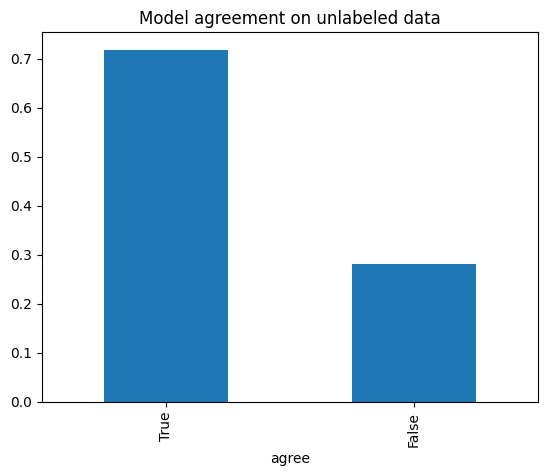

In [19]:
df_combined["agree"].value_counts(normalize=True).plot(
    kind="bar",
    title="Model agreement on unlabeled data"
)


**Sentiment Distribution by Model**

<Axes: title={'center': 'Sentiment distribution by model'}>

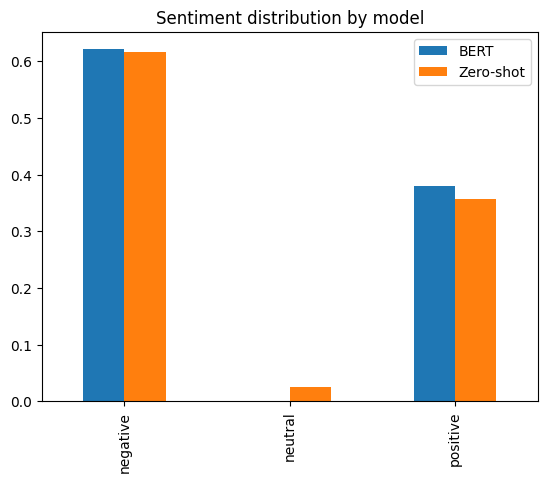

In [ ]:
dist = pd.DataFrame({
    "BERT": df_combined["sent_bert"].value_counts(normalize=True),
    "Zero-shot": df_combined["sent_zeroshot"].value_counts(normalize=True)
})

dist.plot(kind="bar", title="Sentiment distribution by model")


**What does BERT do when zero-shot says neutral?**

In [21]:
neutral_df = df_combined[
    df_combined["sent_zeroshot"] == "neutral"
]

neutral_df["sent_bert"].value_counts(normalize=True)


,proportion
sent_bert,
negative,0.635029
positive,0.364971


<Axes: title={'center': 'BERT predictions on zero-shot neutral cases'}, xlabel='sent_bert'>

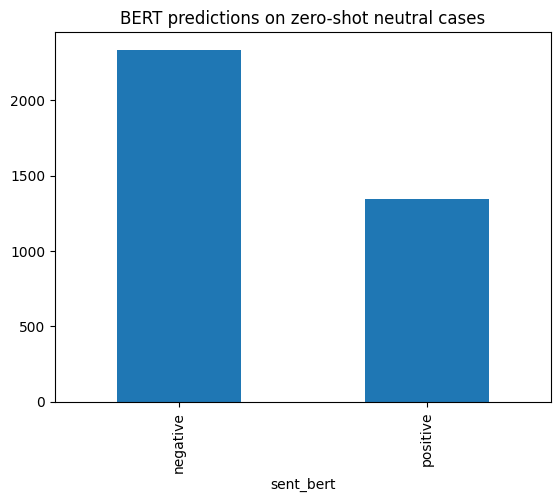

In [22]:
neutral_df["sent_bert"].value_counts().plot(
    kind="bar",
    title="BERT predictions on zero-shot neutral cases"
)
